In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [7]:
import nltk
nltk.download('stopwords')

In [70]:
df=pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')
df.head()

In [69]:
data=pd.read_csv('/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv')

In [10]:
df.info()

In [8]:
df.isna().sum()

# EDA

In [15]:
from matplotlib.axes import Axes
from wordcloud import WordCloud
from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
import re

In [16]:
#불용어 다운로드
stopword=stopwords.words('english')

In [17]:
stopword[:4]

In [18]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer

In [71]:
#소문자로 바꿔주기

def lowerdef(text):
    return text.lower()

df['Review']=df['Review'].apply(lowerdef)

In [72]:
#불용어 제거
def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopword:
            x.append(i)
    return x

df['Review']=df['Review'].apply(remove_stopwords)

In [73]:
df.head()

In [74]:
def count_words(sentences)->Counter:
    #word_list=[word_tokenize(sentence) for sentence in sentences]
    word_list=sorted(chain.from_iterable(sentences))
    return Counter(word_list)

def plot_words(word_dict:Counter,ax:Axes,title)->Axes:
    word_cloud=WordCloud(
        max_words=100,width=2000,height=1000,
        prefer_horizontal=1.0,background_color='white'
    )
    word_cloud.generate_from_frequencies(word_dict)
    ax.imshow(word_cloud)
    ax.axis('off')
    if title:
        ax.set_title(title,fontsize=20)
    return ax

In [75]:
#리뷰별 빈도수 체크
word_dict=dict()
labels=[1,2,3,4,5]
for label in labels:
    reviews=df[df['Rating']==label]['Review'].tolist()
    word_dict[label]=count_words(reviews)
    print(f'평점 {label}점 리뷰에서 빈도수가 높은 단어:',word_dict[label].most_common(5))

In [ ]:
#fig, ax = plt.subplots(3, 2, figsize=(15,8))

#for row in range(3):
#    for col in range(2):
#        label = labels[row*2+col]
#        ax[row,col] = plot_words(word_dict[label],ax[row,col],f'평점 {label}점 리뷰')
#plt.suptitle('평점 별 빈도수가 높은 단어', fontsize=28, y=1.01)
#plt.show()

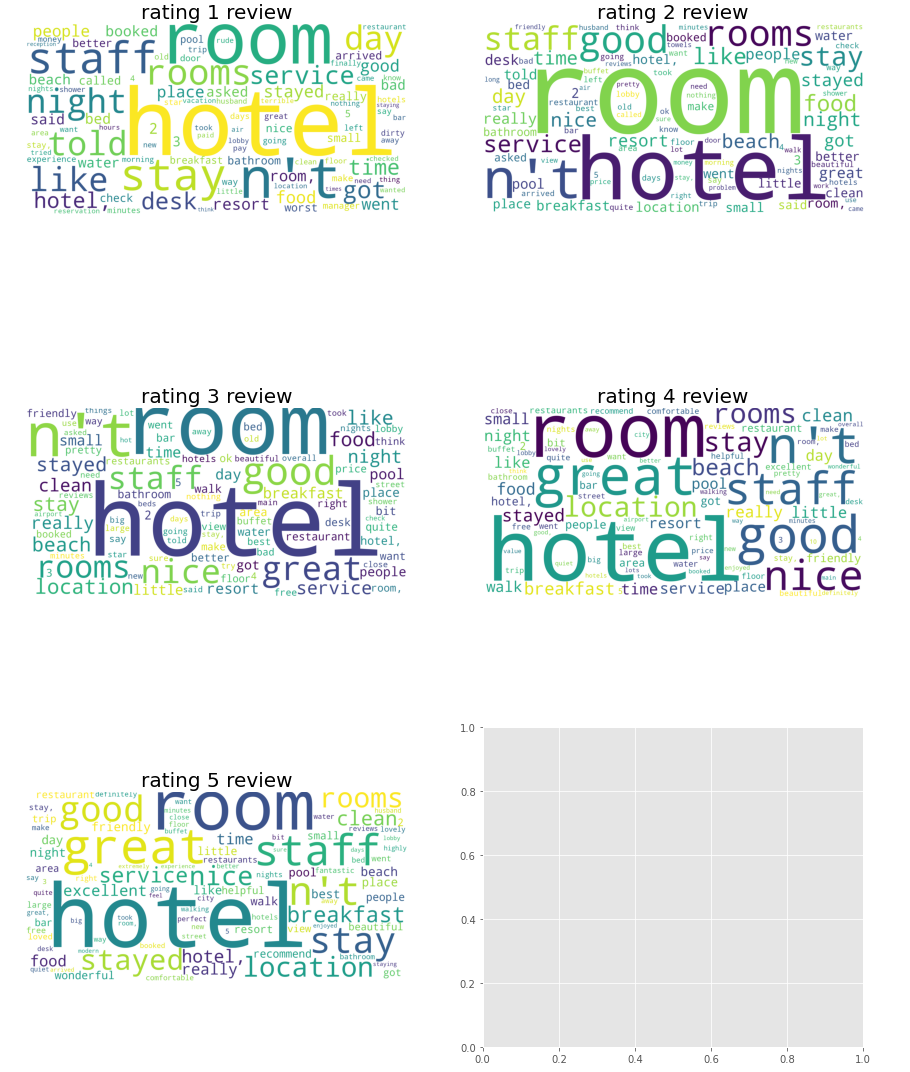

출력이 되긴하는데 마지막 그래프 오류 때문에 저장이 안되어서 그냥 그림으로 보여주려고 한다. 

In [196]:
sns.countplot(data=df,x='Rating')

각 평점 별로 리뷰가 균일하지 않아서 제대로 된 결과가 나오지 않을 거 같다. 그래서 따로 데이터를 크롤링해오거나 augmentation을 하던가 해서 균일하게 맞춰주어야 할 거 같음. 

In [197]:
df['Review'][0]

In [23]:
df['review_len']=0

for i in range(len(df)):
    df['review_len'][i]=len(df['Review'][i])

df.head()

In [24]:
sns.lineplot(data=df,x='Rating',y='review_len')

리뷰길이와 평점과 관계가 있을까 싶어서 확인해봤다. 평점을 구리게 줄수록 구구절절 할얘기가 많은가 보다. 평점이 5이면 거의 리뷰가 짧다. 

In [201]:
#별점이 1점인 리뷰 한개 확인
rating1=data[data['Rating']==1]
rating1['Review'][15]

꽤나 구구절절이다. 
대충 베개에 핏자국을 발견했고 바꿔달라고 했는데 무례하게 대처했다는내용ㅇㅇ

In [202]:
#별점이 1점인 리뷰 한개 확인
rating5=data[data['Rating']==5]
rating5['Review'][3]

이사람은 pet friendly 방에 묵었는데 동물냄새도 안나고 털도 없고 사랑스럽고 어쩌구 여튼 좋았다고 한다. 근데 브랜디라는 금붕어가 매우 행복해했다는데 금붕어를 위해 여기 묵은건가..? 금붕어랑 같이 모나코 여행왔나부다

In [203]:
df.head()

In [28]:
def join(text):
    text=" ".join(text)
    return text
    
df['Review']=df['Review'].apply(join)

In [29]:
df.head()

# train and test

In [30]:
X=df['Review']
y=df['Rating']

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# sentence length

In [208]:
length_dist=[len(x.split(" "))for x in X]
sns.histplot(data=length_dist)

In [209]:
np.mean(length_dist)

# BERT


In [32]:
df.head()

## Rating column into categorical data

In [35]:
encoded_dict={1:0,2:1,3:2,4:3,5:4}
y_train_encode=y_train.map(encoded_dict)
y_test_encode=y_test.map(encoded_dict)

In [50]:
y_train_encode.value_counts()

In [ ]:
y_test_encode.value_counts()

In [37]:
from tensorflow.keras.utils import to_categorical

y_train_cate=to_categorical(y_train_encode)
y_test_cate=to_categorical(y_test_encode)

In [38]:
y_train_cate

## Getting transformers Package

In [39]:
!pip install transformers
import transformers

In [40]:
from transformers import AutoTokenizer,TFBertModel
tokenizer=AutoTokenizer.from_pretrained('bert-base-cased')
bert=TFBertModel.from_pretrained('bert-base-cased')

# Input data modeling

In [41]:
x_train=tokenizer(
    text=X_train.tolist(),
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)
x_test=tokenizer(
    text=X_test.tolist(),
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [42]:
input_ids=x_train['input_ids']
attention_mask=x_train['attention_mask']

In [43]:
x_test['input_ids']

In [44]:
x_test['attention_mask']

# Model Building

In [45]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [46]:
max_len=128
input_ids=Input(shape=(max_len,),dtype=tf.int32,name="input_ids")
input_mask=Input(shape=(max_len,),dtype=tf.int32,name="attention_mask")

embeddings=bert(input_ids,attention_mask=input_mask)[0]

out=tf.keras.layers.GlobalMaxPool1D()(embeddings)
out=Dense(128,activation='relu')(out)
out=tf.keras.layers.Dropout(0.1)(out)
out=Dense(32,activation='relu')(out)

y=Dense(5,activation='sigmoid')(out)

model=tf.keras.Model(inputs=[input_ids,input_mask],outputs=y)
model.layers[2].trainable=True

# Model Compilation

In [47]:
optimizer=Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss=CategoricalCrossentropy(from_logits=True)
metric=CategoricalAccuracy('balanced_accuracy'),

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

# Model Training

In [48]:
train_history=model.fit(
    x={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']},
    y=y_train_cate,
    validation_data=(
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']},
        y_test_cate
    ),
    epochs=20,
    batch_size=36
)

In [51]:
train_history=model.fit(
    x={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']},
    y=y_train_cate,
    validation_data=(
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']},
        y_test_cate
    ),
    epochs=3,
    batch_size=36
)

# Model Evaluation

In [52]:
predicted_raw=model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

In [53]:
y_predicted=np.argmax(predicted_raw,axis=1)
y_true=y_test_encode

# Classification Report

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_predicted))


66%의 정확도, 구리다. 

# Prediction Pipeline

In [ ]:
texts = input(str('input the text : '))

x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True) 

validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100

for key , value in zip(encoded_dict.keys(),validation[0]):
    print(key,value)

In [55]:
def prediction_pipeline(texts):

    x_val = tokenizer(
        text=texts,
        add_special_tokens=True,
        max_length=128,
        truncation=True,
        padding='max_length', 
        return_tensors='tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True) 

    validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100
    
    print(texts)
    for key , value in zip(encoded_dict.keys(),validation[0]):
        print(key,value)



In [56]:
prediction_pipeline('omg wonderful fucking hotel')

In [59]:
prediction_pipeline('Wow, Ive never seen a hotel like this before There something weird on my pillow. Its dirty and smells')

In [61]:
prediction_pipeline('It is the best hotel in my life')
